# Graph embedding using [DeepWalk](https://arxiv.org/pdf/1403.6652.pdf) and[ node2vec](https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf)

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy

from graph_embedding_continuity import *

In [2]:
N = 20
# Barabasi-Albert parameter
m = 3

N_TRAIN = 50
EMBEDDING_SIZE = 2
WALK_LENGTH = 10
WINDOW_SIZE = 2
N_NEG = 2
HIDDEN_SIZE = 16

USE_CUDA = False

## Embedding under removal of an edge that disconnects the graph

In [3]:
# generate a random graph that bridges to clusters
G1 = nx.barabasi_albert_graph(N, 2)
G2 = nx.barabasi_albert_graph(N, 2)

# relabel nodes of G2
d = {}
for v in G1.nodes:
    d[v] = N+v
G2 = nx.relabel_nodes(G2, d)

G = nx.union(G1, G2)

G.add_edge(N-1, N)
# add some random weights on each edge
for _, _, d in G.edges(data=True):
    d['weight'] = np.random.rand()
    
# save layout
pos = nx.spring_layout(G)

# create a new graph by removing the bridge edge, resulting in a disconnected graph
G_removed = deepcopy(G)
G_removed.remove_edge(N-1, N)

### DeepWalk

In [4]:
emb_words_dw, emb_contexts_dw = deepwalk_embedding_time_reg([G, G_removed],
                                                            k=EMBEDDING_SIZE,
                                                            n_train=N_TRAIN,
                                                            walk_length=WALK_LENGTH,
                                                            window_size=WINDOW_SIZE,
                                                            n_neg=N_NEG,
                                                            hidden_size = HIDDEN_SIZE,
                                                            use_cuda=USE_CUDA,
                                                           )

emb_word_dw, emb_removed_word_dw = emb_words_dw
emb_context_dw, emb_removed_context_dw = emb_contexts_dw

Epoch : 1/50: 100%|███████████████████████████████████| 40.0/40.0 [00:00<00:00, 40.8it/s, loss=51.1]
Epoch : 10/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 40.9it/s, loss=50.9]
Epoch : 20/50: 100%|██████████████████████████████████| 40.0/40.0 [00:01<00:00, 38.7it/s, loss=38.2]
Epoch : 30/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 44.3it/s, loss=37.1]
Epoch : 40/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 42.2it/s, loss=36.7]
Epoch : 50/50: 100%|████████████████████████████████████| 40.0/40.0 [00:00<00:00, 44.0it/s, loss=37]
Epoch : 1/50: 100%|█████████████████████████████████████| 40.0/40.0 [00:00<00:00, 44.7it/s, loss=36]
Epoch : 10/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 44.2it/s, loss=35.8]
Epoch : 20/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 45.0it/s, loss=36.1]
Epoch : 30/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 43.5it/s, l

### node2vec -  depth-first incentive

In [5]:
p = 1.0
q = 1/3

emb_words_dfs, emb_contexts_dfs = node2vec_embedding_time_reg([G, G_removed],
                                                              p=p,
                                                              q=q,
                                                              k=EMBEDDING_SIZE,
                                                              n_train=N_TRAIN,
                                                              walk_length=WALK_LENGTH,
                                                              window_size=WINDOW_SIZE,
                                                              n_neg=N_NEG,
                                                              hidden_size = HIDDEN_SIZE,
                                                              use_cuda=USE_CUDA,
                                                             )

emb_word_dfs, emb_removed_word_dfs = emb_words_dfs
emb_context_dfs, emb_removed_context_dfs = emb_contexts_dfs

Epoch : 1/50: 100%|███████████████████████████████████| 40.0/40.0 [00:00<00:00, 42.2it/s, loss=51.3]
Epoch : 10/50: 100%|████████████████████████████████████| 40.0/40.0 [00:01<00:00, 39.4it/s, loss=50]
Epoch : 20/50: 100%|██████████████████████████████████| 40.0/40.0 [00:01<00:00, 39.4it/s, loss=39.2]
Epoch : 30/50: 100%|████████████████████████████████████| 40.0/40.0 [00:01<00:00, 38.2it/s, loss=37]
Epoch : 40/50: 100%|██████████████████████████████████| 40.0/40.0 [00:01<00:00, 39.9it/s, loss=37.6]
Epoch : 50/50: 100%|██████████████████████████████████| 40.0/40.0 [00:01<00:00, 38.2it/s, loss=37.5]
Epoch : 1/50: 100%|███████████████████████████████████| 40.0/40.0 [00:00<00:00, 41.5it/s, loss=35.5]
Epoch : 10/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 41.6it/s, loss=35.9]
Epoch : 20/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 43.3it/s, loss=36.8]
Epoch : 30/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 43.6it/s, l

### node2vec - breadth-first incentive

In [6]:
p = 1.0
q = 3.0

emb_words_bfs, emb_contexts_bfs = node2vec_embedding_time_reg([G, G_removed],
                                                              p=p,
                                                              q=q,
                                                              k=EMBEDDING_SIZE,
                                                              n_train=N_TRAIN,
                                                              walk_length=WALK_LENGTH,
                                                              window_size=WINDOW_SIZE,
                                                              n_neg=N_NEG,
                                                              hidden_size = HIDDEN_SIZE,
                                                              use_cuda=USE_CUDA,
                                                             )

emb_word_bfs, emb_removed_word_bfs = emb_words_bfs
emb_context_bfs, emb_removed_context_bfs = emb_contexts_bfs

Epoch : 1/50: 100%|███████████████████████████████████| 40.0/40.0 [00:00<00:00, 42.7it/s, loss=51.3]
Epoch : 10/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 40.9it/s, loss=50.9]
Epoch : 20/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 40.9it/s, loss=41.6]
Epoch : 30/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 42.3it/s, loss=37.1]
Epoch : 40/50: 100%|██████████████████████████████████| 40.0/40.0 [00:01<00:00, 38.5it/s, loss=36.7]
Epoch : 50/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 44.0it/s, loss=36.3]
Epoch : 1/50: 100%|███████████████████████████████████| 40.0/40.0 [00:00<00:00, 43.3it/s, loss=35.2]
Epoch : 10/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 42.6it/s, loss=35.7]
Epoch : 20/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 42.3it/s, loss=35.8]
Epoch : 30/50: 100%|██████████████████████████████████| 40.0/40.0 [00:00<00:00, 44.4it/s, l

## Compare

/home/sauxpa/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


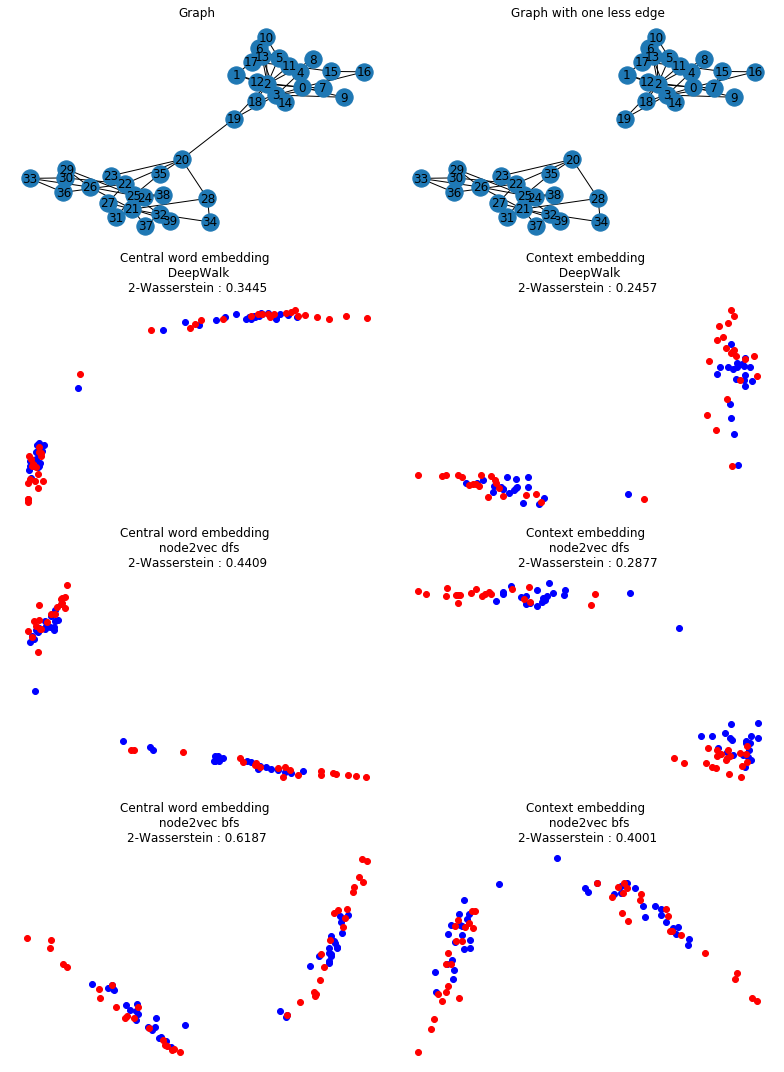

In [7]:
wass_word_dw = wasserstein_metric(emb_word_dw, emb_removed_word_dw)
wass_context_dw = wasserstein_metric(emb_context_dw, emb_removed_context_dw)
wass_word_dfs = wasserstein_metric(emb_word_dfs, emb_removed_word_dfs)
wass_context_dfs = wasserstein_metric(emb_context_dfs, emb_removed_context_dfs)
wass_word_bfs = wasserstein_metric(emb_word_bfs, emb_removed_word_bfs)
wass_context_bfs = wasserstein_metric(emb_context_bfs, emb_removed_context_bfs)

# plot the graph
fig, axes = plt.subplots(figsize=(11,15), nrows=4, ncols=2)

ax = axes[0, 0]
nx.draw_networkx(G, pos = pos, ax=ax)
ax.set_title('Graph')
ax.axis('off')

ax = axes[0, 1]
nx.draw_networkx(G_removed, pos = pos, ax=ax)
ax.set_title('Graph with one less edge')
ax.axis('off')

ax = axes[1, 0]
ax.scatter(emb_word_dw[:, 0], emb_word_dw[:, 1], label='original', color='b')
ax.scatter(emb_removed_word_dw[:, 0], emb_removed_word_dw[:, 1], label='removed', color='r')
ax.set_title('Central word embedding \n DeepWalk\n2-Wasserstein : {:.4f}'.format(wass_word_dw))
# ax.legend(loc='upper right')
ax.axis('off')

ax = axes[1, 1]
ax.scatter(emb_context_dw[:, 0], emb_context_dw[:, 1], label='original', color='b')
ax.scatter(emb_removed_context_dw[:, 0], emb_removed_context_dw[:, 1], label='removed', color='r')
ax.set_title('Context embedding \n DeepWalk\n2-Wasserstein : {:.4f}'.format(wass_context_dw))
# ax.legend(loc='upper right')
ax.axis('off')

ax = axes[2, 0]
ax.scatter(emb_word_dfs[:, 0], emb_word_dfs[:, 1], label='original', color='b')
ax.scatter(emb_removed_word_dfs[:, 0], emb_removed_word_dfs[:, 1], label='removed', color='r')
ax.set_title('Central word embedding \n node2vec dfs\n2-Wasserstein : {:.4f}'.format(wass_word_dfs))
# ax.legend(loc='upper right')
ax.axis('off')

ax = axes[2, 1]
ax.scatter(emb_context_dfs[:, 0], emb_context_dfs[:, 1], label='original', color='b')
ax.scatter(emb_removed_context_dfs[:, 0], emb_removed_context_dfs[:, 1], label='removed', color='r')
ax.set_title('Context embedding \n node2vec dfs\n2-Wasserstein : {:.4f}'.format(wass_context_dfs))
# ax.legend(loc='upper right')
ax.axis('off')

ax = axes[3, 0]
ax.scatter(emb_word_bfs[:, 0], emb_word_bfs[:, 1], label='original', color='b')
ax.scatter(emb_removed_word_bfs[:, 0], emb_removed_word_bfs[:, 1], label='removed', color='r')
ax.set_title('Central word embedding \n node2vec bfs\n2-Wasserstein : {:.4f}'.format(wass_word_bfs))
# ax.legend(loc='upper right')
ax.axis('off')

ax = axes[3, 1]
ax.scatter(emb_context_bfs[:, 0], emb_context_bfs[:, 1], label='original', color='b')
ax.scatter(emb_removed_context_bfs[:, 0], emb_removed_context_bfs[:, 1], label='removed', color='r')
ax.set_title('Context embedding \n node2vec bfs\n2-Wasserstein : {:.4f}'.format(wass_context_bfs))
# ax.legend(loc='upper right')
ax.axis('off')
             
plt.tight_layout()
plt.show()
             
fig.savefig('deepwalk_bridge_removal.eps')